This script tries to use Word2Vec technique on Handelingen data
For Dialects of Discord on the party level
Milan van Lange, June 2021

In [1]:
library(magrittr)
library(tm)
remotes::install_github("bnosac/word2vec")
library(word2vec)
library(XML)
library(qdap)
library(stringr)
library(dplyr)
library(readtext)
library(readr)
library(here)

Le chargement a nécessité le package : NLP

Skipping install of 'word2vec' from a github remote, the SHA1 (12b015e5) has not changed since last install.
  Use `force = TRUE` to force installation

Le chargement a nécessité le package : qdapDictionaries

Le chargement a nécessité le package : qdapRegex

Le chargement a nécessité le package : qdapTools

Le chargement a nécessité le package : RColorBrewer


Attachement du package : ‘qdap’


Les objets suivants sont masqués depuis ‘package:tm’:

    as.DocumentTermMatrix, as.TermDocumentMatrix


L'objet suivant est masqué depuis ‘package:NLP’:

    ngrams


Les objets suivants sont masqués depuis ‘package:base’:

    Filter, proportions



Attachement du package : ‘dplyr’


L'objet suivant est masqué depuis ‘package:qdapTools’:

    id


L'objet suivant est masqué depuis ‘package:qdapRegex’:

    explain


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

  

Load the text data
Pre-processed .txt files are used (without interpunction, stowords removed, all letters to lower case, etc.)

In [2]:
githubURL <- ("https://github.com/MilanvanL/jdh001-9HcfToh7EYm8/raw/main/data/stuff.RDS")
download.file(githubURL, "stuff.RDS")
files2 <- readRDS("stuff.RDS")

Warning message in readRDS("stuff.RDS"):
“la chaîne de caractères en entrée 'mijnheer voorzitter de begroting defensie nederlandse leger belangrijke mate bepaald beslissingen elders de hoogte bedrag eigen behoeften navo bepaald er alleen achteraf goedkeuring bedrag mogelijk wijziging totale defensiebeleid huidige verhoudingen uitgeslotenmet navo bepaalde politieke economische doeleinden nagestreefd bestaande maatschappelijke verhoudingen moeten dienen namelijk eerstezitting 1969-1970 eerste kamer280 9de vergadering 13 januari 70 vaststelling hfdst x defensie staatsbedr artillerie-inrichtingen 1970ijmkers plaats handhaven maatschappelijke verhoudingen aangesloten landen handhaving heerschappij bezittende klasse in tweede plaats middel hoge defensie-uitgaven groep bezitters grote winstgevende orders helpen dat begrip veiligheid navo dienendat eigenlijk begrip „veiligheid brandkast winsten privilegesdit natuurlijk zaak openlijk verkopen bevolking defensielasten betalen daarom verhaal were

Warning message in readRDS("stuff.RDS"):
“la chaîne de caractères en entrée 'mijnheer voorzitter zoals vorige spreker inhoudsrijk betoog duidelijk uitkomen orde zijnde wetsontwerp groot belang als zovele belangrijke wetsontwerpen totstandkoming heel tijd gevergd de behandeling ervan althans dusverre schijnt gemakkelijker gaan zelfs uitzonderlijk moeizaam de commissie-feber commissie-duk geworden ontwerp gemaakt 1969 ingediend zeer ongunstig ontvangen tweede kamer deze minister zeer deskundig gebied strafprocesrecht ontwerp diverse onderdelen aanzienlijk gewijzigd dusdoende erken gaarne meeste onderdelen belangrijk verbeterdeen zeer uitgebreide gedetailleerde soms ge<e3><ab>motioneerde mondelinge behandeling tweede kamer gevolgd ware uitputtingsslag waarvan resultaat ligt erg enthousiast fractie daarover de minister noemt memorie antwoord kamer resultaat twee keer toe „aanvaardbaar uitdrukking blijk geeft grote voldoening uiteindelijke inhoud ontwerp hij tweede kamer aanneming amendemen

Train word2vec model --------------------------------------------------

Train party specific models ---------------------------------------------

In [3]:
# CPN
# Subset specific year, set as character vector to serve as input for word2vec package
files2 %>%
  filter(str_detect(doc_id, "cpn")) -> cpn.7075

In [8]:
# set as character
cpn.7075 <- as.character(cpn.7075$text)

ERROR: Error in cpn.7075$text: $ operator is invalid for atomic vectors


In [5]:
# train model
# train word2vec
model.cpn.7075 <- word2vec(x = cpn.7075, min_count = 5, threads = 4, type = 'skip-gram', dim = 100, iter = 20 )

Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”


In [9]:
# create matrix
emb.cpn.7075 <- as.matrix(model.cpn.7075)

VVD

In [10]:
# Subset specific year, set as character vector to serve as input for word2vec package
files2 %>%
  filter(str_detect(doc_id, "vvd")) -> vvd.7075

In [11]:
# set as character
vvd.7075 <- as.character(vvd.7075$text)

In [12]:
# train model
# train word2vec
model.vvd.7075 <- word2vec(x = vvd.7075, min_count = 5, threads = 4, type = 'skip-gram', dim = 100)

Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”


In [13]:
# create matrix
emb.vvd.7075 <- as.matrix(model.vvd.7075)

PvdA

In [14]:
# Subset specific year, set as character vector to serve as input for word2vec package
files2 %>%
  filter(str_detect(doc_id, "pvda")) -> pvda.7075

In [15]:
# set as character
pvda.7075 <- as.character(pvda.7075$text)

In [16]:
# train model
# train word2vec
model.pvda.7075 <- word2vec(x = pvda.7075, min_count = 5, threads = 4, type = 'skip-gram', dim = 100)

Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”
Warning message in writeLines(text = x, con = filehandle_train):
“chaîne de caractères incorrecte dans la conversion de la sortie”


In [17]:
# create matrix
emb.pvda.7075 <- as.matrix(model.pvda.7075)

In [18]:
# CDA
# Subset specific year, set as character vector to serve as input for word2vec package
files2 %>%
  filter(str_detect(doc_id, "cda")) -> cda.7075

In [19]:
# set as character
cda.7075 <- as.character(cda.7075$text)

In [20]:
# train model
# train word2vec
model.cda.7075 <- word2vec(x = cda.7075, min_count = 5, threads = 4, type = 'skip-gram', dim = 100)

In [21]:
# create matrix
emb.cda.7075 <- as.matrix(model.cda.7075)

Training complete, go to analysis in next script 2_analyse_plot_7075_parties.R (see below)

Script 2 
This script analyses and plots the data prepared in 1_load_train.R
Dialects of Discord, Milan van Lange and Ralf Futselaar, 2021

Create variables per party ----------------------------------------------------------------

In [22]:
# Create the word lists (they are generic as they are not party-specific)
words.weapon <-  c("kernwapen", "kernwapens", "atoomwapen", "atoomwapens", "kruisraket", "kruisraketten", "kruisvluchtwapen", "kruisvluchtwapens", "lanceraket", "lanceraketten", "navokernwapen", "navokernwapens" )
words.prol <- c("afschrikking",  "tactischnucleaire",  "proliferatieverdrag",  "strategischnucleaire", "proliferatie", "afschrikkingsevenwicht",  "afschrikkingsstrategie", "atoomparaplu", "waarborgenstelsel", "kernwapenstrategie" , "afschrikwekkende", "afschrikkingstheorie", "deterrent", "afschrikkingsfunctie", "afschrikkingspolitiek", "afschrikkingsrol", "afschrikkingswapen", "afschrikkingswapens", "afschrikkingsmacht") 
words.nonprol <- c("ontwapening", "nonproliferatieverdrag", "kernwapenvrije", "kernwapenvrij", "denuclearisatie", "atoomvrije", "nonproliferatie",  "wapenbeperking", "wapenbeheersingsbesprekingen", "ontwapeningsbesprekingen", "kernstop", "ontwapeningsoverleg", "denuclearisering", "atoomvrij",   "gedenucleariseerd", "wapenbeheersing", "ontwapeningsonderhandelingen", "wapenbeheersingsonderhandelingen", "wapenvermindering") 

In [23]:
# CPN
# Create 'kernwapen' vector 
wv.cpn <- predict(model.cpn.7075, newdata = words.weapon, type = "embedding")
wv.cpn <- na.omit(wv.cpn)
comb.wv.cpn <- colMeans(wv.cpn) # this seems to work good, but there is an alternative approach: comb.wv <- wv["kernwapen", ] + wv["kernwapens", ]  + wv["atoomwapens", ] + wv["atoomwapen", ] #+ wv["kruisraket", ] + wv["kruisraketten", ] + wv["kruisvluchtwapen", ]+ wv["kruisvluchtwapens", ]

In [24]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.cpn <- predict(model.cpn.7075, newdata = comb.wv.cpn, type="nearest", top_n=100)
vecs_nns_nuc.100.cpn <- emb.cpn.7075[nns_wv.cpn$term,]

In [25]:
# Create 'proliferation' vector
pv.cpn <- predict(model.cpn.7075, newdata = words.prol, type = "embedding")
pv.cpn <- na.omit(pv.cpn)
comb.pv.cpn <- colMeans(pv.cpn) 

In [26]:
# Create 'non-proliferation' vector
nv.cpn <- predict(model.cpn.7075, newdata = words.nonprol, type = "embedding")
nv.cpn <- na.omit(nv.cpn)
comb.nv.cpn <- colMeans(nv.cpn) 

Calculate distance (cosine similarity) to plot results  ---------------------------------

In [27]:
# Create scores for plotting by comparing vectors of 'kernwapen' and viewpoints
score_prol.cpn <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cpn, comb.pv.cpn))
score_nonprol.cpn <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cpn, comb.nv.cpn))

In [28]:
# VVD
# Create 'kernwapen' vector 
wv.vvd <- predict(model.vvd.7075, newdata = words.weapon, type = "embedding")
wv.vvd <- na.omit(wv.vvd)
comb.wv.vvd <- colMeans(wv.vvd) # this seems to work good, but there is an alternative approach: comb.wv <- wv["kernwapen", ] + wv["kernwapens", ]  + wv["atoomwapens", ] + wv["atoomwapen", ] #+ wv["kruisraket", ] + wv["kruisraketten", ] + wv["kruisvluchtwapen", ]+ wv["kruisvluchtwapens", ]

In [29]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.vvd <- predict(model.vvd.7075, newdata = comb.wv.vvd, type="nearest", top_n=100)
vecs_nns_nuc.100.vvd <- emb.vvd.7075[nns_wv.vvd$term,]

In [30]:
# Create 'proliferation' vector
pv.vvd <- predict(model.vvd.7075, newdata = words.prol, type = "embedding")
pv.vvd <- na.omit(pv.vvd)
comb.pv.vvd <- colMeans(pv.vvd) 

In [31]:
# Create 'non-proliferation' vector
nv.vvd <- predict(model.vvd.7075, newdata = words.nonprol, type = "embedding")
nv.vvd <- na.omit(nv.vvd)
comb.nv.vvd <- colMeans(nv.vvd) 

Calculate distance (cosine similarity) to plot results  ---------------------------------

In [32]:
# Create scores for plotting by comparing vectors of 'kernwapen' and viewpoints
score_prol.vvd <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.vvd, comb.pv.vvd))
score_nonprol.vvd <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.vvd, comb.nv.vvd))

In [33]:
# PvdA
# Create 'kernwapen' vector 
wv.pvda <- predict(model.pvda.7075, newdata = words.weapon, type = "embedding")
wv.pvda <- na.omit(wv.pvda)
comb.wv.pvda <- colMeans(wv.pvda) # this seems to work good, but there is an alternative approach: comb.wv <- wv["kernwapen", ] + wv["kernwapens", ]  + wv["atoomwapens", ] + wv["atoomwapen", ] #+ wv["kruisraket", ] + wv["kruisraketten", ] + wv["kruisvluchtwapen", ]+ wv["kruisvluchtwapens", ]

In [34]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.pvda <- predict(model.pvda.7075, newdata = comb.wv.pvda, type="nearest", top_n=100)
vecs_nns_nuc.100.pvda <- emb.pvda.7075[nns_wv.pvda$term,]

In [35]:
# Create 'proliferation' vector
pv.pvda <- predict(model.pvda.7075, newdata = words.prol, type = "embedding")
pv.pvda <- na.omit(pv.pvda)
comb.pv.pvda <- colMeans(pv.pvda) 

In [36]:
# Create 'non-proliferation' vector
nv.pvda <- predict(model.pvda.7075, newdata = words.nonprol, type = "embedding")
nv.pvda <- na.omit(nv.pvda)
comb.nv.pvda <- colMeans(nv.pvda) 

Calculate distance (cosine similarity) to plot results  ---------------------------------

In [37]:
# Create scores for plotting by comparing vectors of 'kernwapen' and viewpoints
score_prol.pvda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.pvda, comb.pv.pvda))
score_nonprol.pvda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.pvda, comb.nv.pvda))

In [38]:
# CDA
# Create 'kernwapen' vector 
wv.cda <- predict(model.cda.7075, newdata = words.weapon, type = "embedding")
wv.cda <- na.omit(wv.cda)
comb.wv.cda <- colMeans(wv.cda) # this seems to work good, but there is an alternative approach: comb.wv <- wv["kernwapen", ] + wv["kernwapens", ]  + wv["atoomwapens", ] + wv["atoomwapen", ] #+ wv["kruisraket", ] + wv["kruisraketten", ] + wv["kruisvluchtwapen", ]+ wv["kruisvluchtwapens", ]

In [39]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.cda <- predict(model.cda.7075, newdata = comb.wv.cda, type="nearest", top_n=100)
vecs_nns_nuc.100.cda <- emb.cda.7075[nns_wv.cda$term,]

In [40]:
# Create 'proliferation' vector
pv.cda <- predict(model.cda.7075, newdata = words.prol, type = "embedding")
pv.cda <- na.omit(pv.cda)
comb.pv.cda <- colMeans(pv.cda) 

In [41]:
# Create 'non-proliferation' vector
nv.cda <- predict(model.cda.7075, newdata = words.nonprol, type = "embedding")
nv.cda <- na.omit(nv.cda)
comb.nv.cda <- colMeans(nv.cda) 

In [42]:
# Calculate distance (cosine similarity) to plot results  ---------------------------------
# Create scores for plotting by comparing vectors of 'kernwapen' and viewpoints
score_prol.cda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cda, comb.pv.cda))
score_nonprol.cda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cda, comb.nv.cda))

Plotting ----------------------------------------------------------------

In [43]:
setwd(here("output"))

In [44]:
pdf('plot_7075_parties.pdf', width=8, height=8)

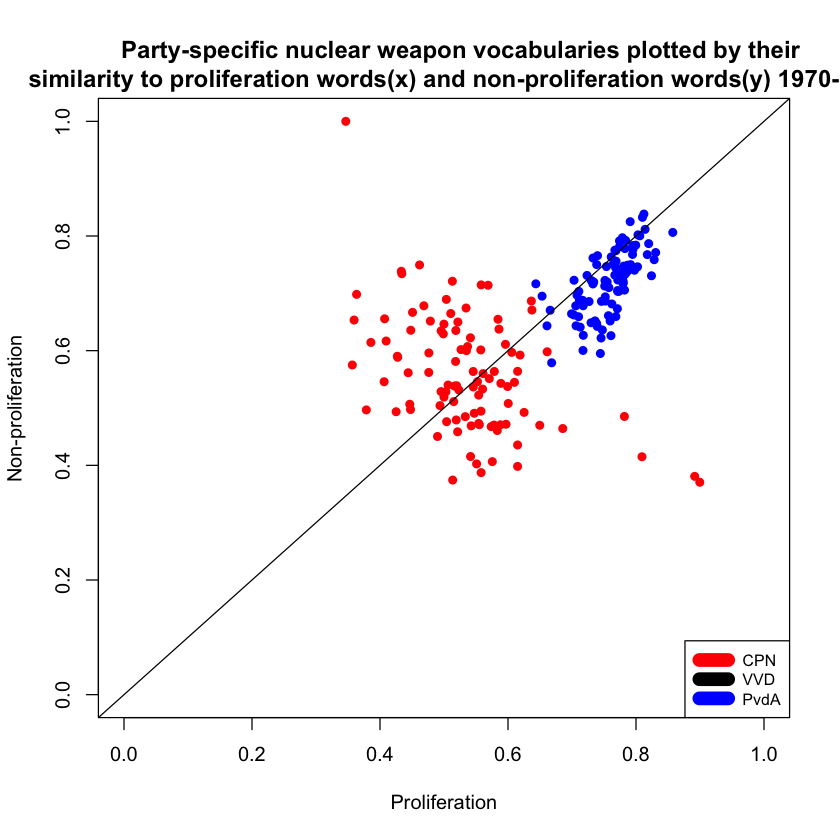

In [45]:
plot(score_prol.pvda$V1, score_nonprol.pvda$V1,ylim=c(0, 1.0), xlim=c(0,1.0), xlab = "Proliferation", ylab = 'Non-proliferation',
type='p', pch=16, col=c("blue"),
main="
     Party-specific nuclear weapon vocabularies plotted by their
     similarity to proliferation words(x) and non-proliferation words(y) 1970-1975")
points(score_prol.cpn$V1, score_nonprol.cpn$V1, pch=16, col=c("red"))
points(score_prol.vvd$V1, score_nonprol.vvd$V1, pch=16, col=c("black"))
#points(score_prol.cda$V1, score_nonprol.cda$V1, pch=16, col=c("green"))
abline(a=0,b=1)
legend('bottomright', legend=c("CPN", "VVD", "PvdA"),
       col=c("red", "black", "blue"), lwd=11, cex=0.8)

In [46]:
#turn off
dev.off()

pdf 
  3

The End 